In [7]:
import random
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [15]:
#this is the mathematical fuction, z is the z-distance where you want to slice. Height is the base height below the microlenses. 
def make_lenslet_surf(z,Xlist, Ylist, Rlist, xg, yg, samples,r_lenslet,Nlenslets,aperR=900,height=50):
        if z<=height:
            aper=np.sqrt(xg**2+yg**2) <= aperR
            return aper
        else:
            T = np.zeros(len(xg))
            for n in range(Nlenslets):
                #sph = np.real(np.sqrt(0j+Rlist[n]**2 - (xg-Xlist[n])**2 - (yg-Ylist[n])**2))-Rlist[n]+10
                sph1 = np.real(np.sqrt(0j+Rlist[n]**2 - (xg-Xlist[n])**2 - (yg-Ylist[n])**2))-np.real(np.sqrt(0j+Rlist[n]**2-r_lenslet**2))-(z-height)

                T = np.maximum(T,sph1)
                T=(T>0)
                #T=T.astype(float32)
            aper = np.sqrt(xg**2+yg**2) <= aperR

            return (T)*aper



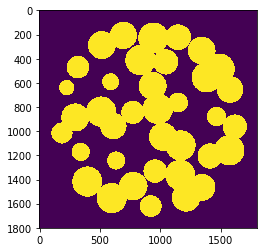

In [17]:
r_lenslet=150
samples = (1800,1800)
xgrng = np.array((-900, 900)) #in microns 
ygrng=xgrng
yg = np.linspace(ygrng[0], ygrng[1], samples[0])
xg=yg
px=xg[1] - xg[0]
py=px
X,Y= np.meshgrid(xg,yg)

xpos=np.array([ 0.14612837,  0.71721864,  0.24878536,  0.02303368, -0.28676   ,
        -0.5555203 ,  0.26926583,  0.6776483 ,  0.08065559,  0.31480727,
         0.67188287, -0.29987562,  0.4472303 , -0.2629405 ,  0.12434713,
        -0.601601  , -0.5786936 , -0.20353931,  0.05928293, -0.67162883,
        -0.3869435 , -0.12216239,  0.48567393, -0.5014613 ,  0.44351405,
        -0.12503134, -0.06180583, -0.38118827,  0.03805367,  0.5129664 ,
         0.24860163,  0.04429083,  0.56503314,  0.2663069 ,  0.5895729 ,
        -0.7106739 , -0.30863953])
ypos=np.array([-0.47143236,  0.06322537, -0.13573071,  0.7196315 ,  0.05813731,
         0.2715504 ,  0.21764675, -0.24329564, -0.08334541,  0.64753103,
         0.25879234,  0.6535626 ,  0.5642562 ,  0.34251764,  0.14690305,
        -0.01247394, -0.42838496, -0.69063145,  0.43011135, -0.25945097,
        -0.06059348,  0.5548861 , -0.34397984,  0.5166591 , -0.56524503,
        -0.05451034, -0.48637706, -0.61081547, -0.2739432 ,  0.30565697,
        -0.6757198 , -0.6709341 , -0.02069343,  0.46220085, -0.4132842 ,
         0.11551029, -0.3080526 ])
rlist=np.array([5.828535 , 6.1590457, 7.9095016, 7.210874 , 5.2639585, 8.432963 ,
        3.498147 , 5.1620317, 3.3644474, 4.320925 , 3.4587631, 3.454391 ,
        5.1511827, 8.462513 , 4.4780993, 4.5459094, 6.867732 , 4.917013 ,
        6.5178514, 9.240515 , 3.400135 , 4.292744 , 3.4103484, 3.483244 ,
        4.6867547, 6.6917057, 3.3727362, 4.557815 , 4.5659766, 5.848995 ,
        5.5287976, 3.3733428, 8.0873   , 3.4124787, 3.152522 , 7.4457736,
        8.801951 ])
Nlenslets=37
xpos=np.reshape(xpos,(37))*1000
ypos=np.reshape(ypos,(37))*1000
rlist=np.reshape(rlist,(37))*1000
T2=make_lenslet_surf(51,xpos,ypos,rlist,X,Y,samples,r_lenslet,Nlenslets)
plt.imshow(T2)
#plt.colorbar()